In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

1. Directly apply SLR and MLR

In [2]:
df= pd.read_csv("cars.csv")
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [3]:
# dropping the 'Car_ID' column as it is not needed for analysis
df.drop('Car_ID', axis=1, inplace=True)

In [4]:
cont_cols = ['Year','Kilometers_Driven','Mileage','Engine','Power','Price']

<Axes: >

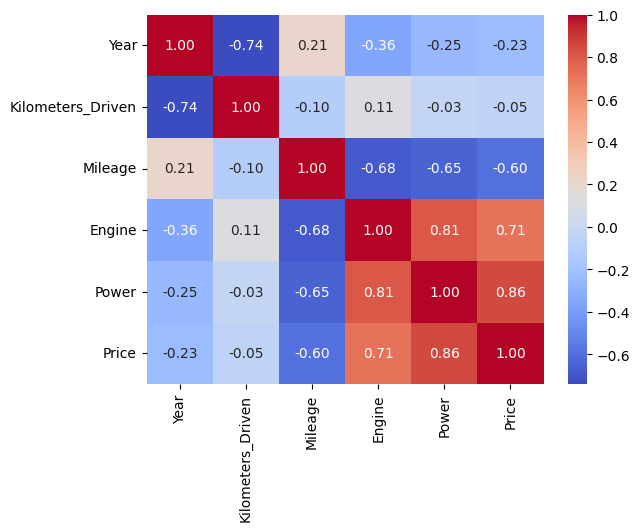

In [5]:
sns.heatmap(df[cont_cols].corr(), annot=True, cmap='coolwarm',fmt=".2f")

In [6]:
# Since Power is more correlated with Price, we will choose Power as our feature for SLR
X = df[['Power']]
y = df['Price']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80,), (20,))

In [9]:
slr = LinearRegression()
slr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
slr.coef_, slr.intercept_

(array([10689.46681703]), np.float64(-80706.17632771726))

In [11]:
slr_predicts = slr.predict(X_test)

In [12]:
slr_rmse = np.sqrt(mean_squared_error(y_test, slr_predicts))
slr_r2 = r2_score(y_test, slr_predicts)
slr_mae = mean_absolute_error(y_test, slr_predicts)

In [13]:
print(f"SLR RMSE: {slr_rmse}")
print(f"SLR R^2: {slr_r2}")
print(f"SLR MAE: {slr_mae}")

SLR RMSE: 460834.78114766924
SLR R^2: 0.7403329516226445
SLR MAE: 371709.8499810203


In [14]:
# percentage error
slr_pct_error = slr_mae / y_test.mean()*100
slr_pct_error

np.float64(31.500834744154265)

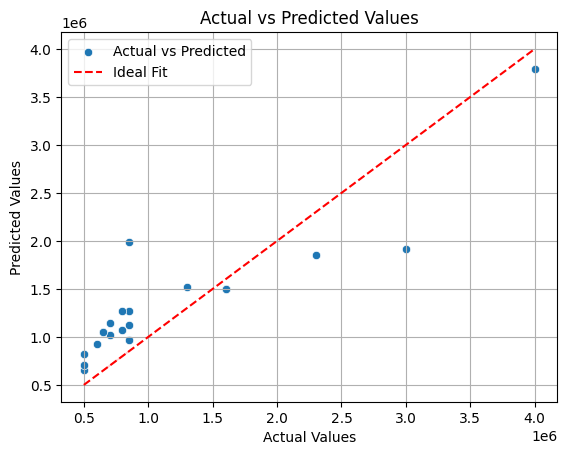

In [15]:
sns.scatterplot(x=y_test, y=slr_predicts,label="Actual vs Predicted")
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--',label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

## MLR

<Axes: >

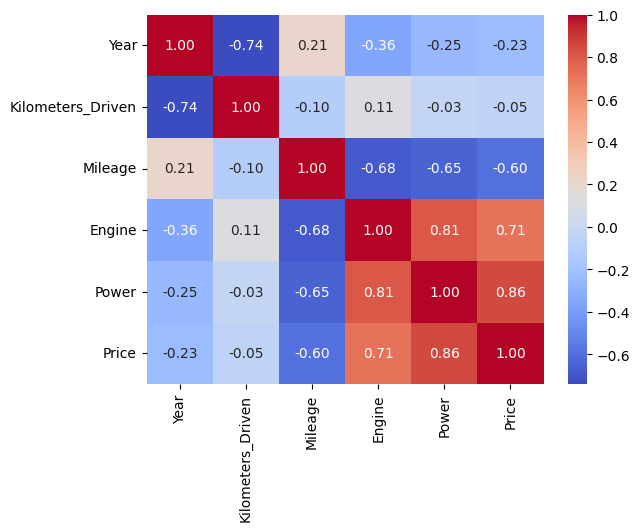

In [16]:

sns.heatmap(df[cont_cols].corr(), annot=True, cmap='coolwarm',fmt=".2f")

In [17]:
# Power, Mileage and Engine are highly correlated with Price.
# But Engine and Mileage are also highly correlated with each other.
# SO we will only consider Power and Mileage for MLR

<Axes: xlabel='Year', ylabel='Price'>

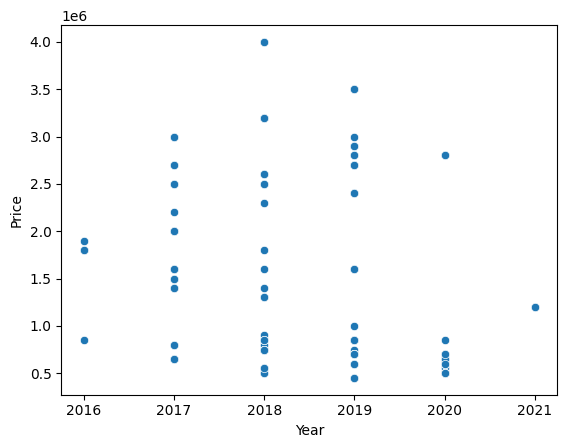

In [18]:
#checking Year and Price
sns.scatterplot(x='Year', y='Price', data=df)

In [19]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 11), (20, 11), (80,), (20,))

In [21]:
X_train['Model'].unique()

array(['A5', 'Mustang', 'A6', 'Tigor', 'Elantra', 'City', 'Ranger',
       'Innova Crysta', 'X1', 'WR-V', 'Endeavour', 'X5', 'E-Class',
       'Nexon', 'X3', 'Ameo', 'Tiguan', 'Camry', 'Polo', 'C-Class', 'GLC',
       'S-Cross', 'Passat', 'Thar', 'Harrier', 'Swift', 'Q3', 'GLE', 'A4',
       'Scorpio', 'A3', 'Venue', '3 Series', 'Altroz', 'Vento',
       'Fortuner', 'Q7', 'Aspire', 'EcoSport', 'Santro', 'GLA', 'Verna',
       '7 Series', 'Safari', 'Civic', 'Tiago', 'Figo', 'XUV300', 'BR-V',
       'Innova', 'Vitara', 'Ertiga'], dtype=object)

In [22]:
# converting categorical to continuous
from sklearn.preprocessing import OrdinalEncoder
cat_cols = ['Brand','Model','Transmission','Fuel_Type','Owner_Type']
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_test[cat_cols] = encoder.transform(X_test[cat_cols])

In [23]:
X_train

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
55,0.0,4.0,2018,28000,0.0,0.0,0.0,17,1968,187,5
88,2.0,27.0,2019,22000,1.0,0.0,0.0,13,2261,396,4
26,0.0,5.0,2018,28000,1.0,0.0,0.0,15,1984,241,5
42,8.0,41.0,2018,42000,0.0,1.0,0.0,24,1047,69,5
69,4.0,16.0,2017,32000,0.0,0.0,1.0,22,1582,126,5
...,...,...,...,...,...,...,...,...,...,...,...
60,4.0,45.0,2019,24000,1.0,0.0,1.0,17,1497,113,5
71,6.0,46.0,2019,24000,1.0,1.0,1.0,17,1462,103,5
14,6.0,18.0,2020,18000,1.0,1.0,0.0,19,1462,103,7
92,10.0,43.0,2017,32000,1.0,1.0,1.0,18,1598,103,5


In [24]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
mlr_predicts = mlr.predict(X_test)
mlr_rmse = np.sqrt(mean_squared_error(y_test, mlr_predicts))
mlr_r2 = r2_score(y_test, mlr_predicts)
mlr_mae = mean_absolute_error(y_test, mlr_predicts)

print(f"MLR RMSE: {mlr_rmse}")
print(f"MLR R^2: {mlr_r2}")
print(f"MLR MAE: {mlr_mae}")

MLR RMSE: 488887.3062789694
MLR R^2: 0.7077571703359946
MLR MAE: 356047.5738808185


In [26]:
mlr_pct_error = mlr_mae / y_test.mean()*100
mlr_pct_error

np.float64(30.173523210238855)

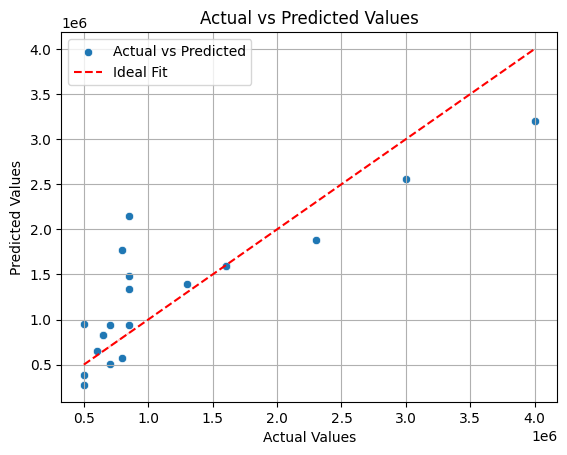

In [27]:
sns.scatterplot(x=y_test, y=mlr_predicts,label="Actual vs Predicted")
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--',label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

2. Apply on clean data and MLR

In [28]:
# continuous columns
cont_cols = ['Kilometers_Driven','Mileage','Engine','Power','Price']

In [29]:
# cleaning data
Q1 = df[cont_cols].quantile(0.25)
Q3 = df[cont_cols].quantile(0.75)
IQR = Q3 - Q1

In [30]:
df[((df[cont_cols] < (Q1 - 3 * IQR)) | (df[cont_cols] > (Q3 + 3 * IQR))).any(axis=1)]

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000


In [31]:
df_clean = df[~((df[cont_cols] < (Q1 - 3 * IQR)) | (df[cont_cols] > (Q3 + 3 * IQR))).any(axis=1)]

In [32]:
df_clean.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
5,Tata,Nexon,2019,35000,Petrol,Manual,First,17,1198,108,5,750000


In [33]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(
    df_clean.drop('Price', axis=1), 
    df_clean['Price'], 
    test_size=0.2, 
    random_state=42
)

encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_test[cat_cols] = encoder.transform(X_test[cat_cols])

In [34]:
mlr_clean = LinearRegression()
mlr_clean.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
mlr_clean_predicts = mlr_clean.predict(X_test)
mlr_clean_rmse = np.sqrt(mean_squared_error(y_test, mlr_clean_predicts))
mlr_clean_r2 = r2_score(y_test, mlr_clean_predicts)
mlr_clean_mae = mean_absolute_error(y_test, mlr_clean_predicts)

print(f"MLR RMSE: {mlr_clean_rmse}")
print(f"MLR R^2: {mlr_clean_r2}")
print(f"MLR MAE: {mlr_clean_mae}")

MLR RMSE: 310466.5375257389
MLR R^2: 0.86516479993954
MLR MAE: 276893.6856722549


In [36]:
mlr_clean_pct_error = mlr_clean_mae / y_test.mean()*100
mlr_clean_pct_error

np.float64(18.127246197856294)

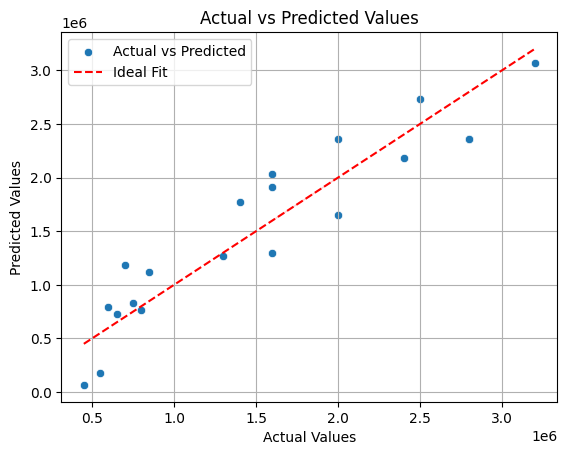

In [37]:
sns.scatterplot(x=y_test, y=mlr_clean_predicts, label="Actual vs Predicted")
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--',label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

3. Introduce new features and apply MLR

### Feature Enginnering

In [38]:
# creating new features

from datetime import datetime
current_year = datetime.now().year

df_clean['Car_Age'] = current_year - df_clean['Year']
# df_clean['Ass_New'] = (df_clean['Year'] == 2025).astype(int)

df_clean['Km_per_Year'] = df_clean['Kilometers_Driven'] / df_clean['Car_Age']
# df_clean['Heavy_Usage'] = (df_clean['Km_per_Year'] > 20000).astype(int)

df_clean['Power_to_Engine_Ratio'] = df_clean['Power'] / df_clean['Engine']
df_clean['Mileage_per_Seat'] = df_clean['Mileage'] / df_clean['Seats']

df_clean['Power_per_Seat'] = df_clean['Power'] / df_clean['Seats']
df_clean['Engine_per_Seat'] = df_clean['Engine'] / df_clean['Seats']

# luxury_brands = ['A4','X1','C-Class','Q3','5 Series','GLC','A6','X3','E-Class','7 Series','GLE','Q7','X5','GLA','A5','3 Series']
# df_clean['Luxury_Brand'] = df_clean['Brand'].isin(luxury_brands).astype(int)

df_clean.drop('Year', axis=1, inplace=True)

/tmp/ipykernel_10031/1400614942.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Car_Age'] = current_year - df_clean['Year']
/tmp/ipykernel_10031/1400614942.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Km_per_Year'] = df_clean['Kilometers_Driven'] / df_clean['Car_Age']
/tmp/ipykernel_10031/1400614942.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [39]:
df_clean.head()

,Brand,Model,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Km_per_Year,Power_to_Engine_Ratio,Mileage_per_Seat,Power_per_Seat,Engine_per_Seat
0,Toyota,Corolla,50000,Petrol,Manual,First,15,1498,108,5,800000,7,7142.857143,0.072096,3.0,21.6,299.6
1,Honda,Civic,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,6,6666.666667,0.087664,3.4,28.0,319.4
3,Maruti,Swift,30000,Diesel,Manual,Third,23,1248,74,5,600000,5,6000.000000,0.059295,4.6,14.8,249.6
4,Hyundai,Sonata,60000,Diesel,Automatic,Second,18,1999,194,5,850000,9,6666.666667,0.097049,3.6,38.8,399.8
5,Tata,Nexon,35000,Petrol,Manual,First,17,1198,108,5,750000,6,5833.333333,0.090150,3.4,21.6,239.6


In [40]:
transformed_df = df_clean.copy()
encod = OrdinalEncoder()
transformed_df[cat_cols] = encod.fit_transform(transformed_df[cat_cols])

<Axes: >

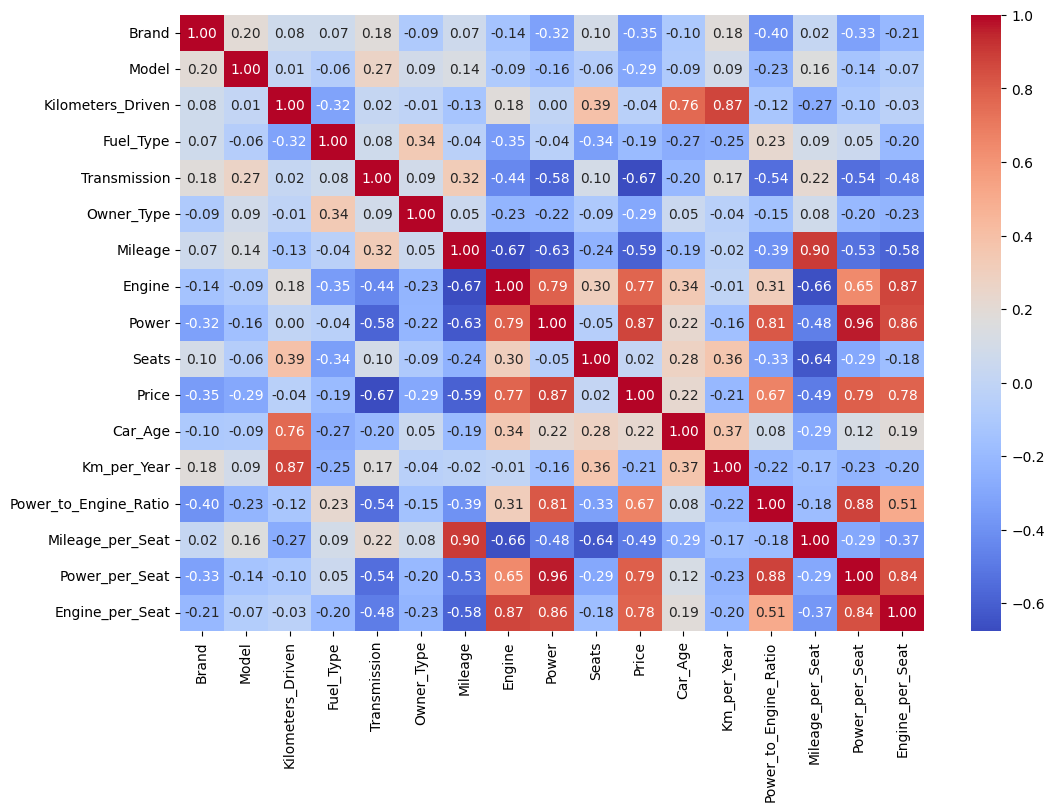

In [41]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(transformed_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [42]:
# choosing columns that are highly correlated with Price

corr_features = (transformed_df.corr()['Price'].abs()>0.3 ).reset_index()
corr_features

,index,Price
0,Brand,True
1,Model,False
2,Kilometers_Driven,False
3,Fuel_Type,False
4,Transmission,True
5,Owner_Type,False
6,Mileage,True
7,Engine,True
8,Power,True
9,Seats,False


In [43]:
highly_corr_feature = corr_features['index'][corr_features['Price']==True].values
highly_corr_feature

array(['Brand', 'Transmission', 'Mileage', 'Engine', 'Power', 'Price',
       'Power_to_Engine_Ratio', 'Mileage_per_Seat', 'Power_per_Seat',
       'Engine_per_Seat'], dtype=object)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    transformed_df[[i for i in highly_corr_feature if i!='Price']], 
    transformed_df['Price'], 
    test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((79, 9), (20, 9), (79,), (20,))

In [45]:
feature_mlr = LinearRegression()
feature_mlr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
feature_mlr_predicts = feature_mlr.predict(X_test)
feature_mlr_rmse = np.sqrt(mean_squared_error(y_test, feature_mlr_predicts))
feature_mlr_r2 = r2_score(y_test, feature_mlr_predicts)
feature_mlr_mae = mean_absolute_error(y_test, feature_mlr_predicts)

print(f"MLR RMSE: {feature_mlr_rmse}")
print(f"MLR R^2: {feature_mlr_r2}")
print(f"MLR MAE: {feature_mlr_mae}")

MLR RMSE: 340140.37654968724
MLR R^2: 0.8381584371125986
MLR MAE: 294605.5738206809


In [47]:
# percentage error
feature_mlr_pct_error = feature_mlr_mae / y_test.mean()*100
feature_mlr_pct_error

np.float64(19.286780610191876)

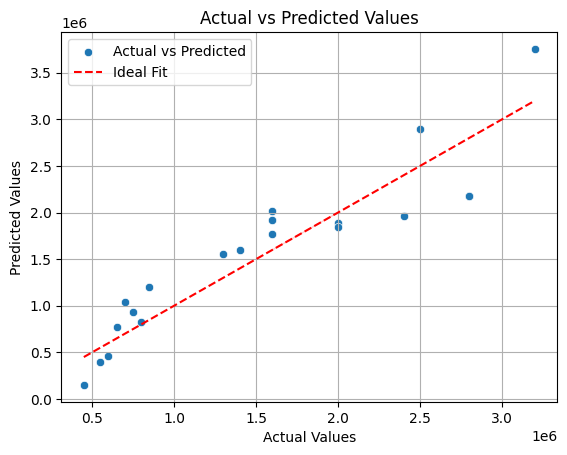

In [48]:
sns.scatterplot(x=y_test, y=feature_mlr_predicts, label="Actual vs Predicted")
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--',label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

## Analysis

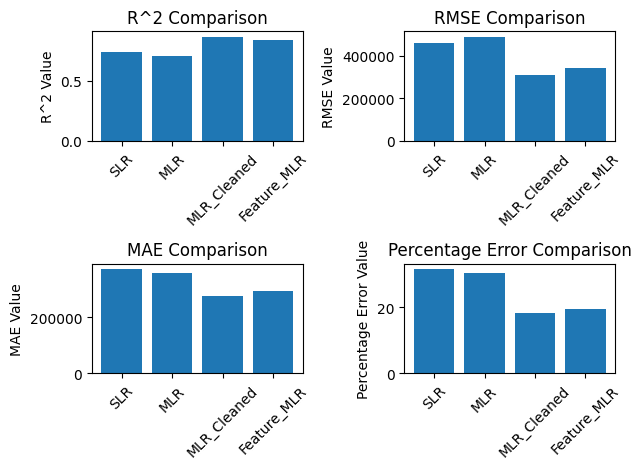

In [49]:
x_axis = ['SLR', 'MLR', 'MLR_Cleaned', 'Feature_MLR']
# plt.Figure(figsize=(12, 12))
fig, axs = plt.subplots(2, 2,)
axs[0, 0].bar(x_axis, [slr_r2, mlr_r2, mlr_clean_r2, feature_mlr_r2])
axs[0, 0].set_title('R^2 Comparison')
axs[0, 0].set_ylabel('R^2 Value')

axs[0, 1].bar(x_axis, [slr_rmse, mlr_rmse, mlr_clean_rmse, feature_mlr_rmse])
axs[0, 1].set_title('RMSE Comparison')
axs[0, 1].set_ylabel('RMSE Value')

axs[1, 0].bar(x_axis, [slr_mae, mlr_mae, mlr_clean_mae, feature_mlr_mae])
axs[1, 0].set_title('MAE Comparison')
axs[1, 0].set_ylabel('MAE Value')

axs[1, 1].bar(x_axis, [slr_pct_error, mlr_pct_error, mlr_clean_pct_error, feature_mlr_pct_error])
axs[1, 1].set_title('Percentage Error Comparison')
axs[1, 1].set_ylabel('Percentage Error Value')

axs[0, 0].xaxis.set_tick_params(rotation=45)
axs[0, 1].xaxis.set_tick_params(rotation=45)
axs[1, 0].xaxis.set_tick_params(rotation=45)
axs[1, 1].xaxis.set_tick_params(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
slr_pct_error, mlr_pct_error, mlr_clean_pct_error, feature_mlr_pct_error

(np.float64(31.500834744154265),
 np.float64(30.173523210238855),
 np.float64(18.127246197856294),
 np.float64(19.286780610191876))

In [51]:
slr_mae, mlr_mae, mlr_clean_mae, feature_mlr_mae

(371709.8499810203, 356047.5738808185, 276893.6856722549, 294605.5738206809)

In [52]:
slr_r2, mlr_r2, mlr_clean_r2, feature_mlr_r2

(0.7403329516226445, 0.7077571703359946, 0.86516479993954, 0.8381584371125986)

In [53]:
slr_rmse, mlr_rmse, mlr_clean_rmse, feature_mlr_rmse

(np.float64(460834.78114766924),
 np.float64(488887.3062789694),
 np.float64(310466.5375257389),
 np.float64(340140.37654968724))